# 📊 Analisis dan Visualisasi Hasil Stress Test
Notebook ini digunakan untuk memuat, menganalisis, dan memvisualisasikan hasil stress test server multithread dan multiprocess berdasarkan data CSV.

In [4]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [7]:
# Load CSV
thread_df = pd.read_csv('stress_results_thread.csv')
process_df = pd.read_csv('stress_results_process.csv')
thread_df['Mode'] = 'Thread'
process_df['Mode'] = 'Process'
df = pd.concat([thread_df, process_df], ignore_index=True)
df.head()

,No,Operasi,Volume (MB),Client Workers,Server Workers,Waktu Total (s),Throughput (Bps),Client Sukses,Client Gagal,Rata2 Waktu per Client,Mode
0,1,upload,10,1,1,0.06,1.834063e+08,1,0,0.05,Thread
1,2,upload,10,1,5,0.05,2.026974e+08,1,0,0.04,Thread
2,3,upload,10,1,50,0.05,2.056440e+08,1,0,0.04,Thread
3,4,upload,10,5,1,0.11,4.948442e+08,5,0,0.08,Thread
4,5,upload,10,5,5,0.10,5.365146e+08,5,0,0.07,Thread


## 📈 Visualisasi Throughput berdasarkan Jumlah Worker Client dan Server

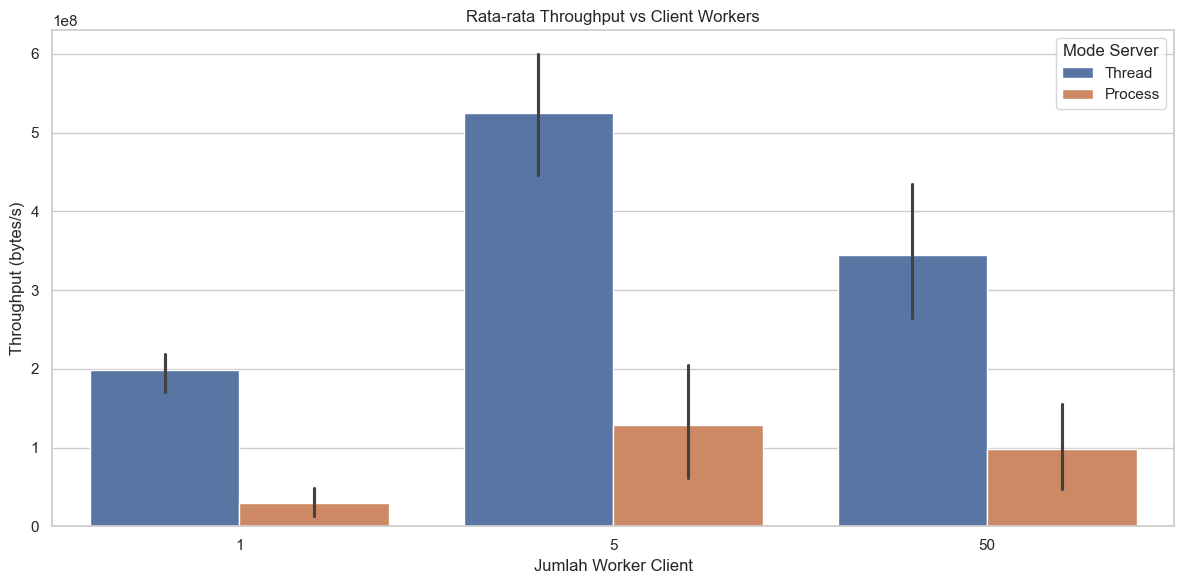

In [9]:
# Plot throughput terhadap jumlah worker client dan server
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Client Workers", y="Throughput (Bps)", hue="Mode")
plt.title("Rata-rata Throughput vs Client Workers")
plt.ylabel("Throughput (bytes/s)")
plt.xlabel("Jumlah Worker Client")
plt.legend(title="Mode Server")
plt.tight_layout()
plt.show()

## ⏱️ Visualisasi Waktu Total vs Volume File

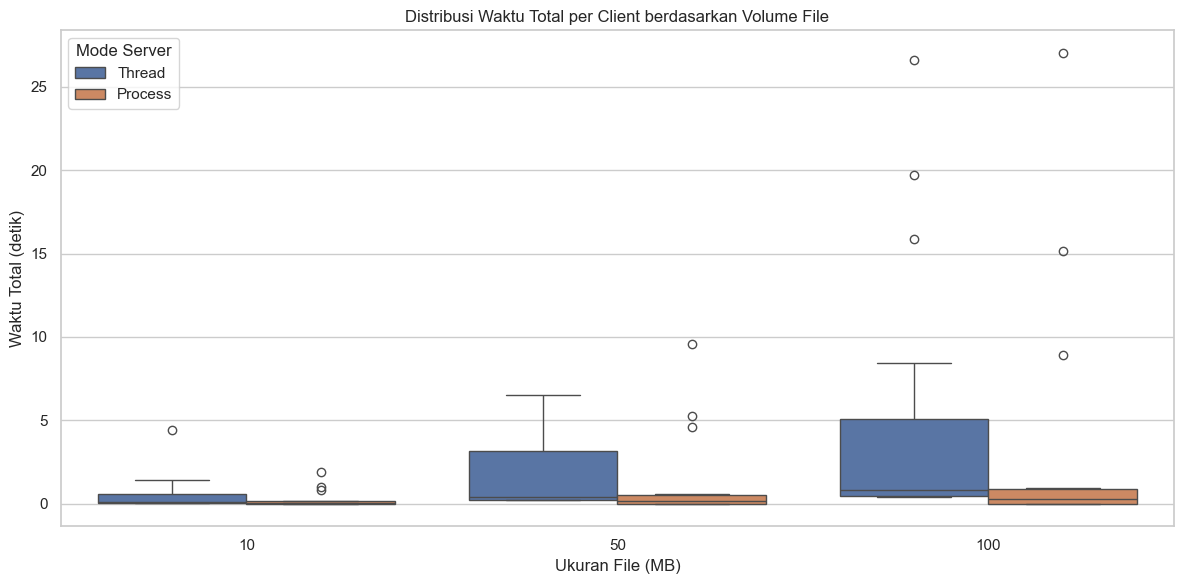

In [10]:
# Waktu total terhadap volume file
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Volume (MB)", y="Rata2 Waktu per Client", hue="Mode")
plt.title("Distribusi Waktu Total per Client berdasarkan Volume File")
plt.ylabel("Waktu Total (detik)")
plt.xlabel("Ukuran File (MB)")
plt.legend(title="Mode Server")
plt.tight_layout()
plt.show()

## ✅ Sukses vs Gagal per Mode

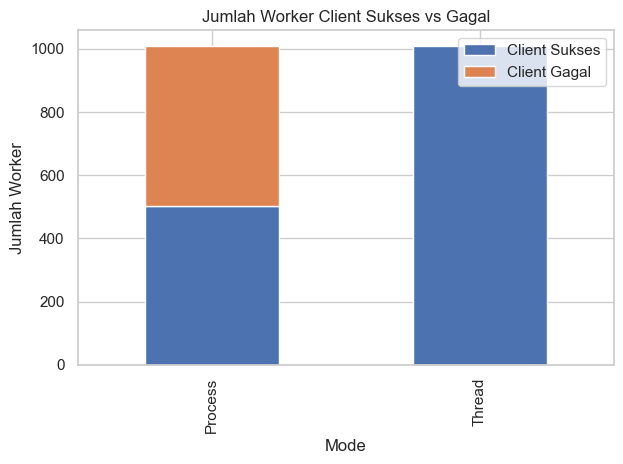

In [19]:
# Hitung total sukses dan gagal
summary = df.groupby("Mode")[["Client Sukses", "Client Gagal"]].sum().reset_index()
summary.plot(kind="bar", x="Mode", stacked=True)
plt.title("Jumlah Worker Client Sukses vs Gagal")
plt.ylabel("Jumlah Worker")
plt.tight_layout()
plt.show()